In [1]:
import pandas as pd
import numpy as np
import random
from utils.utils import split_samples, generate_connectivity_matrix, find_positives
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from models.AE_model import AE
from models.MLP_classifier import MLP_classifier
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# random.seed(100)
# np.random.seed(42)

In [2]:
df = pd.read_csv('dataset/hmnist_28_28_L.csv')

In [3]:
# Fazendo as transformações nos conjuntos
positive_samples, labels = split_samples(df)
connectivity_matrix = generate_connectivity_matrix(positive_samples, labels, len(df))
X = torch.tensor(df.iloc[:, :-1].values, dtype = torch.float32)
y = torch.tensor(df.label)

In [4]:
# X = X.view(-1, 28,28,3)
# X = F.normalize(X)
dataset = TensorDataset(X, y)
batch_size = 1
dataloader = DataLoader(dataset, batch_size=batch_size)

In [5]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

In [6]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

In [7]:
autoencoder = AE()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = 0.0000001)

# Training the autoencoder
num_epochs = 20

# for epoch in range(num_epochs):
for data in dataloader:
    img, _ = data
    optimizer.zero_grad()
    outputs = autoencoder(img)
    loss = F.binary_cross_entropy_with_logits(outputs, img)
    loss.backward()
    optimizer.step()
    # print(loss)

# print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    print(f'loss {loss.item():.4f}')

X_AE = autoencoder.encoder(X)

loss -65.8606
loss -38.5330
loss -64.4128
loss -49.1586
loss -66.2651
loss -55.2547
loss -84.3666
loss -60.4224
loss -48.6274
loss -84.3969
loss -70.4877
loss -44.5510
loss -66.9540
loss -97.0834
loss -44.8346
loss -72.1677
loss -47.3692
loss -72.2271
loss -37.6766
loss -54.3615
loss -45.8706
loss -47.1178
loss -46.8205
loss -86.0820
loss -48.8750
loss -64.0852
loss -77.9427
loss -67.2014
loss -78.5494
loss -68.6660
loss -68.7694
loss -75.6652
loss -79.6336
loss -44.3610
loss -58.7315
loss -70.3973
loss -56.8289
loss -53.1742
loss -52.7030
loss -48.8394
loss -39.7960
loss -61.8702
loss -74.5341
loss -43.9152
loss -65.0377
loss -48.9460
loss -60.5907
loss -51.7026
loss -53.2094
loss -64.5464
loss -47.7824
loss -76.5685
loss -78.7973
loss -74.5832
loss -67.5231
loss -62.8084
loss -66.5243
loss -46.7686
loss -63.8594
loss -51.9074
loss -52.5771
loss -47.1350
loss -63.0956
loss -58.6075
loss -48.0405
loss -58.0576
loss -55.0311
loss -45.3625
loss -55.7908
loss -100.4388
loss -46.0468
loss 

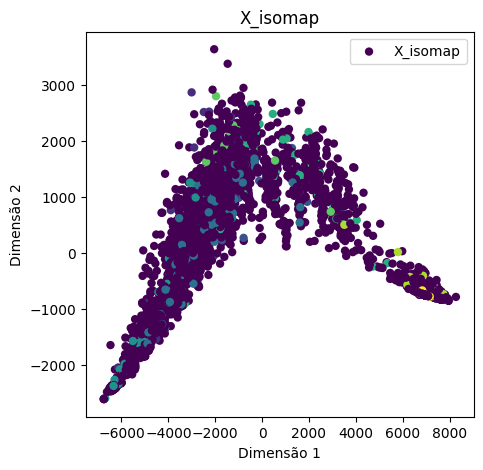

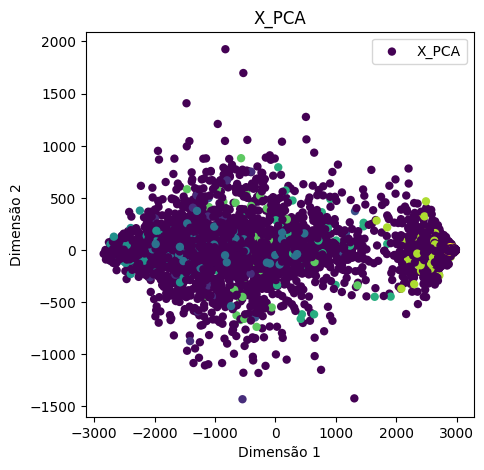

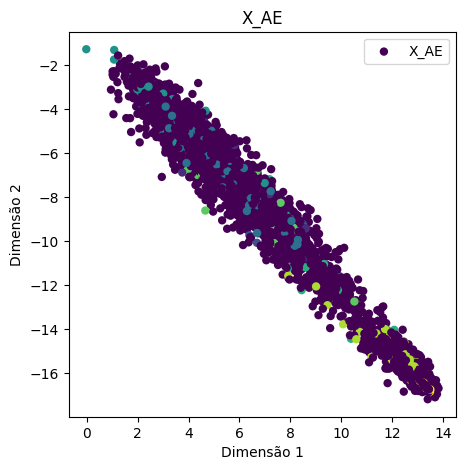

In [8]:
import matplotlib.pyplot as plt

mask_colors = torch.full((len(y),), 0)
for element in positive_samples:
    mask_colors[element] = y[element]

# Função para plotar os dados
def plot_data(X, title, xlabel, ylabel, label):
    plt.figure(figsize=(5, 5))
    plt.scatter(*zip(*X), c=mask_colors, label=label, linewidths=0.01)  # Adicionando a variável y como cor
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot para X_isomap
plot_data(X_isomap, 'X_isomap', 'Dimensão 1', 'Dimensão 2', 'X_isomap')

# Plot para X_PCA
plot_data(X_PCA, 'X_PCA', 'Dimensão 1', 'Dimensão 2', 'X_PCA')

# Plot para X_AE
X_AE_np = X_AE.detach().numpy()
plot_data(X_AE_np, 'X_AE', 'Dimensão 1', 'Dimensão 2', 'X_AE')


In [9]:
positive_labels = y[positive_samples]
nearest_neigh = find_positives(X_AE, positive_labels, positive_samples)

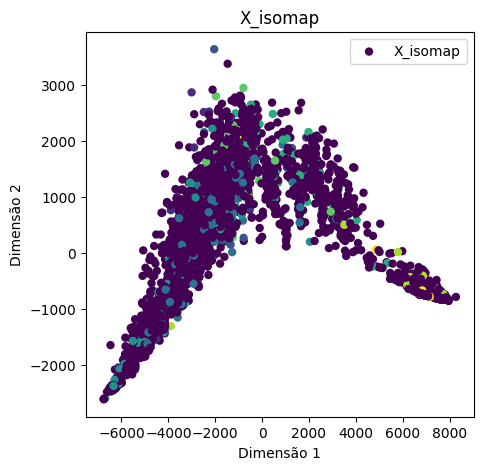

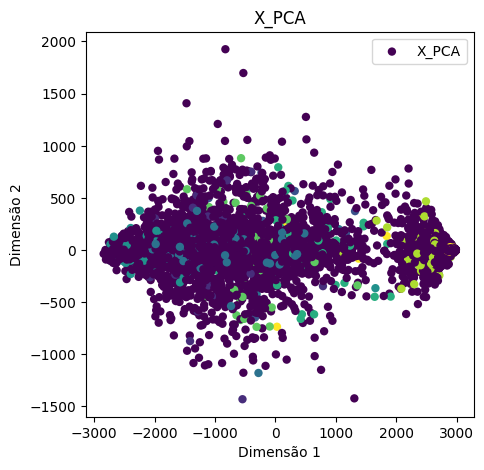

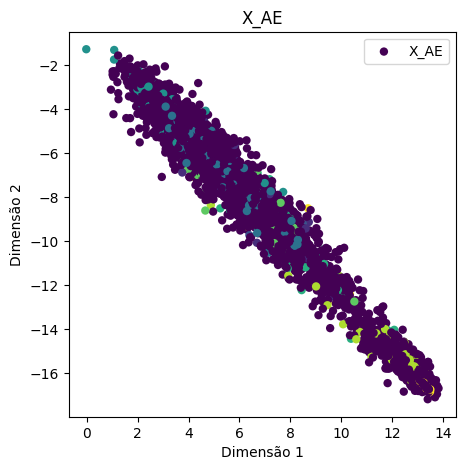

In [10]:
import matplotlib.pyplot as plt

# Função para plotar os dados
def plot_data(X, title, xlabel, ylabel, label):
    plt.figure(figsize=(5, 5))
    plt.scatter(*zip(*X), c=nearest_neigh, label=label, linewidths=0.01)  # Adicionando a variável y como cor
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot para X_isomap
plot_data(X_isomap, 'X_isomap', 'Dimensão 1', 'Dimensão 2', 'X_isomap')

# Plot para X_PCA
plot_data(X_PCA, 'X_PCA', 'Dimensão 1', 'Dimensão 2', 'X_PCA')

# Plot para X_AE
X_AE_np = X_AE.detach().numpy()
plot_data(X_AE_np, 'X_AE', 'Dimensão 1', 'Dimensão 2', 'X_AE')


In [ ]:
# Fazendo um classificador para os novos dados e os dados antigos
mlp_AE = MLP_classifier()